**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import minimize, fsolve

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

Using sympy, we optimize the labor supply in the exam.py file.

In [12]:
from exam import q11_solve_equation
solution = q11_solve_equation()
print("The solution is", solution)

The solution is [(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1)), (kappa*nu + sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))]


Sympy has returned two solutions because the equation we are solving is quadratic. Unfortunately, SYMPY has done derrivations beyond the given solution. The two solutions are:
$\frac{\kappa\nu - \sqrt{\nu(4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2 + \kappa^2\nu)}}{2\nu w (\tau - 1)}$
and
$\frac{\kappa\nu + \sqrt{\nu(4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2 + \kappa^2\nu)}}{2\nu w (\tau - 1)}$

We will now simplify to reach the desired outcome:
The numerator in the square root is the term that needs simplifying. Let's write it in a more compact form and simplify it:

$4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2$

Factor out $4\alpha w^2$:

$4\alpha w^2 (\tau^2 - 2\tau + 1)$

$(\tau^2 - 2\tau + 1)$=$(\tau - 1)^2$. Therefore:

$4\alpha w^2 (\tau - 1)^2$

Remember that we defined $\tilde{w} = (1 - \tau)w$, so this can be simplified further to:
$4\alpha\tilde{w}^2$
Substituting this back into the solutions, we get:

$\frac{-\kappa + \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ and

$\frac{-\kappa - \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$
The second solution is not valid in this context because labor cannot be negative. Therefore, the valid solution is the first one and we have verified the optimal $L^{\star}(\tilde{w})$.

We see that G is not included in the optimal L*, and as such this is the solution for both $G\in\left\{1.0 , 2.0\right\}$.


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In the exam.py file, we...

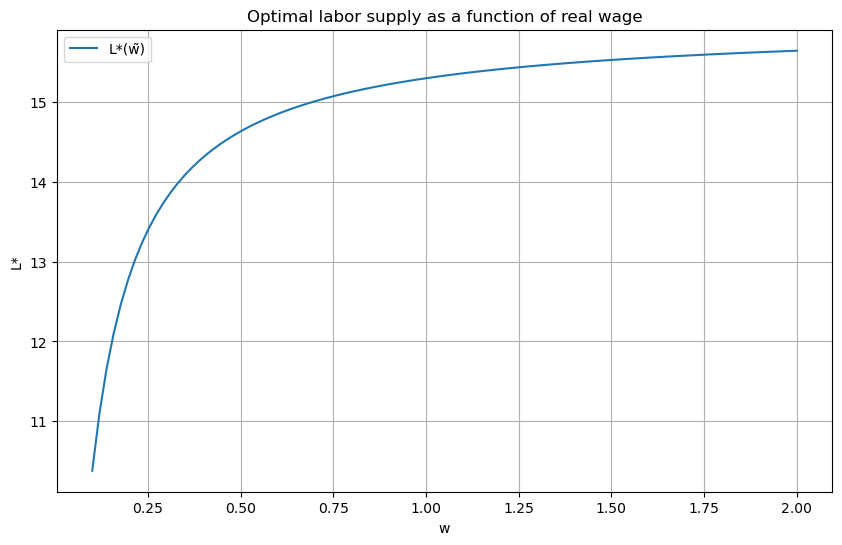

In [13]:
from exam import q12_plot_optimal_labor

# Call the function to display the plot
q12_plot_optimal_labor()

We see that the optimal labour supply increases when the wage increases up to a cetain point around 16 hours. This can be explained by the tax rate being 30%, thus above a certain threshold the extra effort of working is not met by an equal compensation of consumption, especially given that the marginal utility rate of government consumption and consumption is decreasing in scale.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In the exam.py file, we...

c:\Users\emil0\Downloads\projects-2023-best-team\exam.py:80: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * G**(1 - alpha)) - nu * L_star**2 / 2
c:\Users\emil0\Downloads\projects-2023-best-team\exam.py:78: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


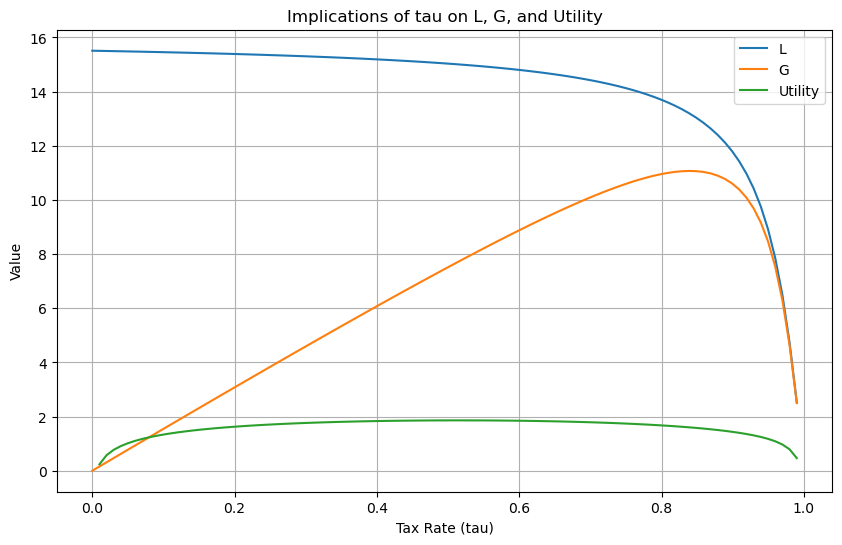

In [4]:
from exam import q13_plot_implications
# Call the function to display the plot
q13_plot_implications()

This figure displays a more detailed version of the laffer curve, showing that even given that government consumption gives utility, above a certain rate of taxation the labour supply decreases and thus the government consumption itself increases when the marginal taxation gets too high. In this graph we can also see that the maximum utility seems to be between 40 and 50%, which can be explained by alpha being 0,5 meaning the marginal utility of government consumption is equal to the marginal utility of consumption and thus the allocations should optimally be more or less equal given differences in other variables.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In the exam.py file, we...

Optimal tax rate (tau_star): 0.5145311264139927
Maximized worker utility: 1.8591992509323028


c:\Users\emil0\Downloads\projects-2023-best-team\exam.py:112: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * (tau * w * L_star)**(1 - alpha)) - nu * L_star**2 / 2
c:\Users\emil0\Downloads\projects-2023-best-team\exam.py:111: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


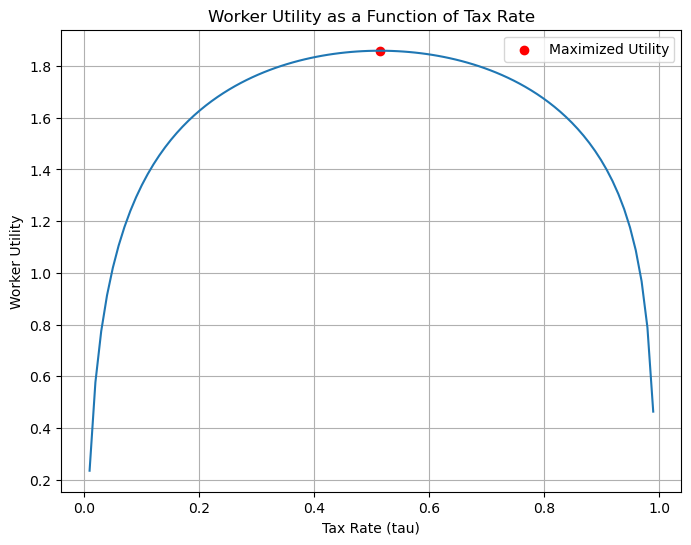

In [1]:
from exam import q14_find_optimal_tax, q14_plot_graph

tau_star, utility_star = q14_find_optimal_tax()
print("Optimal tax rate (tau_star):", tau_star)
print("Maximized worker utility:", utility_star)

q14_plot_graph()

This graph expands on the utlity graph from question 3, we see that above a set level of taxation (calculated to 51%) an increase in the tax rate actually decreases the government consumption, as the labour supply is negatively adjusted. In economic theory this grahp is known as the Laffer curve, however its empirical validation is not as clear.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using $\tau$=0,51 based on this.*

In the py-file

In [5]:
from exam import find_optimal_G, find_optimal_tau, set1, set2

tau_q5 = 0.54
G_q5_set1 = find_optimal_G(tau_q5, set1)
G_q5_set2 = find_optimal_G(tau_q5, set2)

print(f"Optimal G for Set 1: {G_q5_set1[0]}")
print(f"Optimal G for Set 2: {G_q5_set2[0]}")


Optimal G for Set 1: 8.063562097736236
Optimal G for Set 2: 5.1638622159012195


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In the pyfile 

Se i opg 5.

In [11]:
# define constants
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0

# define parameter sets
set1 = {'sigma': 1.001, 'rho': 1.001, 'epsilon': 1.0}
set2 = {'sigma': 1.5, 'rho': 1.5, 'epsilon': 1.0}

# utility function
def utility(L, G, tau, params):
    C = kappa + (1 - tau)*w*L
    term1 = (alpha*C**((params['sigma']-1)/params['sigma']) + (1-alpha)*G**((params['sigma']-1)/params['sigma']))**(params['sigma']/(params['sigma']-1))
    term2 = nu*L**(1+params['epsilon']) / (1+params['epsilon'])
    return (term1**(1-params['rho']) - 1)/(1 - params['rho']) - term2

# find optimal L for given G and tau
def find_L_star(G, tau, params):
    result = minimize(lambda L: -utility(L, G, tau, params), [12.0], method='L-BFGS-B', bounds=[(0, 24)])
    return result.x[0]

# question 5: find G that solves the given equation
tau_q5 = 0.54
G_q5_set1 = fsolve(lambda G: G - tau_q5*w*find_L_star(G, tau_q5, set1), [1])
G_q5_set2 = fsolve(lambda G: G - tau_q5*w*find_L_star(G, tau_q5, set2), [1])
# question 6: find socially optimal tax rate
def social_optimum(tau, params):
    G = fsolve(lambda G: G - tau*w*find_L_star(G, tau, params), [4])
    return -utility(find_L_star(G, tau, params), G, tau, params)

tau_star_set1 = minimize(social_optimum, [0.51], args=(set1), method='L-BFGS-B', bounds=[(0, 1)])
tau_star_set2 = minimize(social_optimum, [0.51], args=(set2), method='L-BFGS-B', bounds=[(0, 1)])

print(f"Optimal G for Set 1: {G_q5_set1[0]}, Optimal Tax Rate for Set 1: {tau_star_set1.x[0]}")
print(f"Optimal G for Set 2: {G_q5_set2[0]}, Optimal Tax Rate for Set 2: {tau_star_set2.x[0]}")


C:\Users\emil0\AppData\Local\Temp\ipykernel_15244\327640330.py:14: RuntimeWarning: invalid value encountered in power
  term1 = (alpha*C**((params['sigma']-1)/params['sigma']) + (1-alpha)*G**((params['sigma']-1)/params['sigma']))**(params['sigma']/(params['sigma']-1))


Optimal G for Set 1: 8.063562097736236, Optimal Tax Rate for Set 1: 0.5107706445849184
Optimal G for Set 2: 5.1638622159012195, Optimal Tax Rate for Set 2: 0.46310460946928433


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [22]:
# Define the variables
ell_t, kappa_t, eta, w = sp.symbols('ell_t kappa_t eta w')

# Define the profit function
Pi_t = kappa_t * ell_t**(1 - eta) - w * ell_t

# Differentiate the profit function with respect to ell_t
dPi_dell_t = sp.diff(Pi_t, ell_t)
dPi_dell_t

-w + ell_t**(1 - eta)*kappa_t*(1 - eta)/ell_t

In [23]:
# Solve the derivative equation for ell_t
optimal_ell_t = sp.solve(dPi_dell_t, ell_t)
# Simplify the equation
simplified_eq = sp.Eq(ell_t,(sp.simplify(optimal_ell_t[0])))
simplified_eq

Eq(ell_t, (kappa_t*(1 - eta)/w)**(1/eta))

In [24]:

# Define the profit function
profit = kappa_t * ell_t**(1 - eta) - w * ell_t

# Set the baseline parameters
eta_value = 0.5
w_value = 1.0

# Calculate the profit for different values of ell_t and verify the maximum
kappa_values = [1.0, 2.0]
for kappa in kappa_values:
    # Calculate the ell_t that maximizes the profit
    ell_optimal = sp.solve(sp.diff(profit.subs([(kappa_t, kappa), (eta, eta_value), (w, w_value)]), ell_t), ell_t)[0]
    # Calculate the maximum profit
    profit_max = profit.subs([(kappa_t, kappa), (eta, eta_value), (w, w_value), (ell_t, ell_optimal)])
    
    # Ensure ell_optimal is a whole number
    ell_optimal = sp.ceiling(ell_optimal)
    
    # Print the results
    print(f'For kappa = {kappa}:')
    print(f'The optimal number of hairdressers (ell_t) is: {ell_optimal.evalf()}')
    print(f'The maximum profit is: {profit_max.evalf()}\n')

For kappa = 1.0:
The optimal number of hairdressers (ell_t) is: 1.00000000000000
The maximum profit is: 0.250000000000000

For kappa = 2.0:
The optimal number of hairdressers (ell_t) is: 1.00000000000000
The maximum profit is: 1.00000000000000



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# Define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5  # We need the value of eta here.
w = 1  # We need the value of wage here.
T = 120    # The number of periods
K = 10000  # The number of shock series for Monte Carlo approximation.
# Initialize the array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series
np.random.seed(0)  # for reproducibility
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

# Loop over the shock series
for k in range(K):
    # Initialize kappa and l
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l[0] = ((1-eta)*kappa[0]/w)**(1/eta)  # initial l
    
    # Calculate l_t and kappa_t for t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l[t] = ((1-eta)*kappa[t]/w)**(1/eta)
    
    # Calculate h for this shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# The ex-ante expected value H is the average of these values
H = np.mean(h_values)
print(H)

27.693592041332398


In [5]:
from exam import calculate_exante_expected_value
H = calculate_exante_expected_value()
print(H)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# Define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0   
T = 120    # The number of periods
K = 10000  # The number of shock series for Monte Carlo approximation.

# Initialize the array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series
np.random.seed(0)  # for reproducibility
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

# Loop over the shock series
for k in range(K):
    # Initialize kappa and l
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
    l[0] = l_star_initial  # initial l

    # Calculate l_t and kappa_t for t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l_star = ((1-eta)*kappa[t]/w)**(1/eta)
        # Update l[t] based on the policy
        if np.abs(l[t-1] - l_star) > 0.05:
            l[t] = l_star
        else:
            l[t] = l[t-1]

    
    # Calculate h for this shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# The ex-ante expected value H is the average of these values
H_new_policy = np.mean(h_values)

# Compare with the previous policy
profitability_improvement = H_new_policy - H
print(H_new_policy)
print(profitability_improvement)

28.411887191796524
0.718295150464126



# Compare with the previous policy
profitability_improvement = H_new_policy - H

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In the pyfile...

In [6]:
from exam import q24_calculate_H_values, q24_find_optimal_Delta, q24_plot_H_vs_Delta

# Define the range of Delta values to test
Delta_values = np.arange(0, 0.51, 0.01)

# Call the function to calculate H_values
H_values = q24_calculate_H_values(Delta_values)

# Call the function to plot H against Delta
q24_plot_H_vs_Delta(Delta_values, H_values)

# Find the Delta value that maximizes H
optimal_Delta = q24_find_optimal_Delta(Delta_values, H_values)
print(f'The optimal Delta that maximizes H is {optimal_Delta}')


KeyboardInterrupt: 

Btw above code takes 4min to run


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [4]:


# Define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0   
T = 120    # The number of periods
K = 10000  # The number of shock series for Monte Carlo approximation.

# Initialize the array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series
np.random.seed(0)  # for reproducibility
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

data = (l[t-1],l[t-2],l[t-3],l[t-4],l[t-5])
t5 = np.mean(data)

# Loop over the shock series
for k in range(K):
    # Initialize kappa and l
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
    l[0] = l_star_initial  # initial l

    # Calculate l_t and kappa_t for t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l_star = ((1-eta)*kappa[t]/w)**(1/eta)
        # Update l[t] based on the policy
        if np.abs(t5 - l_star) > 0.05:
            l[t] = l_star
        else:
            l[t] = t5

    
    # Calculate h for this shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# The ex-ante expected value H is the average of these values
H_own_policy = np.mean(h_values)

# Compare with the previous policy
profitability_improvement = H_own_policy - H
print(H_own_policy)
print(profitability_improvement)

NameError: name 'l' is not defined

27.98957520034882
0.2959831590164228


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

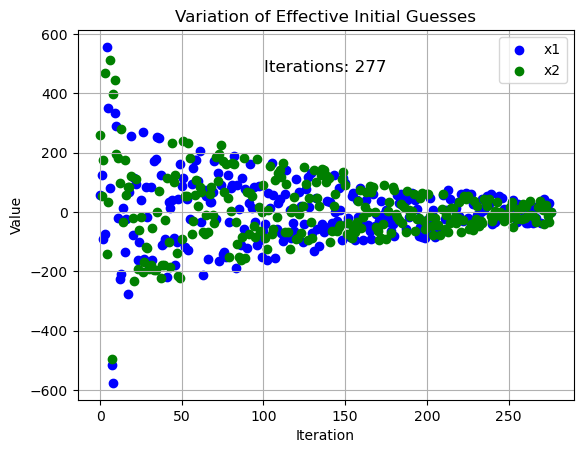

In [9]:
# Set random seed
np.random.seed(0)

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K = 1000

# Run refined global optimizer
x_star, x0_values = refined_global_optimizer(bounds, tau, K_warmup, K, 'BFGS')

# Extract x1 and x2 values from the effective initial guesses
x0_values = np.array(x0_values)
x1_values = x0_values[:, 0]
x2_values = x0_values[:, 1]

# Plotting the variation of effective initial guesses with iteration counter
plt.scatter(range(len(x1_values)), x1_values, c='blue', label='x1')
plt.scatter(range(len(x2_values)), x2_values, c='green', label='x2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Variation of Effective Initial Guesses')
plt.legend()
plt.grid(True)

# Display the number of iterations
plt.text(0.5, 0.9, f'Iterations: {len(x1_values)}', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)

plt.show()


The Grievwank function is a function with an abundant amount of local maxima and minima making it an optimal function to test seaching algoritith to see if they identify the correct maximum point. In this scenario the true minima which our algorithm seaches for is 0, and as we can see in figure XX after around 350 iterations we aproximate the actual minimum of 0. 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

By increasing the number of warmup iterations we increase the number of times the algortithm runs before adjusting for each initial guess, thus giving us a tradeoff in algoriithm effectiveness by "sacrifizing" more unadjusted guesses to train to the algorithm to be more effective in the guesses afterwards. To test this we run the algorithm a 100 times and calculate the average number of iterations needed for each algorithm before hitting the 0 point to better compare the effectiveness.

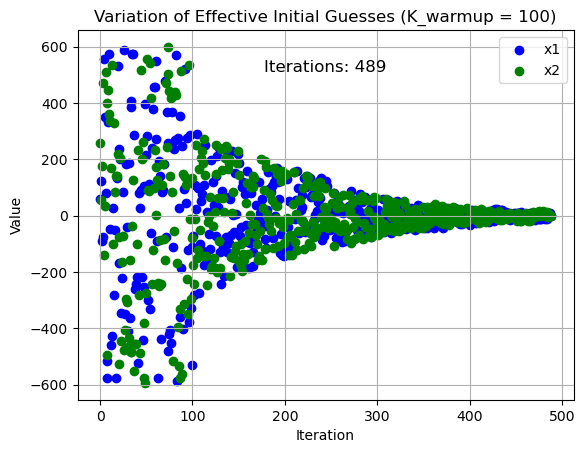

In [8]:

# Set random seed
np.random.seed(0)

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values, k+1

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 100
K = 1000

# Run refined global optimizer
x_star, x0_values, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, 'BFGS')

# Extract x1 and x2 values from the effective initial guesses
x0_values = np.array(x0_values)
x1_values = x0_values[:, 0]
x2_values = x0_values[:, 1]

# Plotting the variation of effective initial guesses with iteration counter
plt.scatter(range(len(x1_values)), x1_values, c='blue', label='x1')
plt.scatter(range(len(x2_values)), x2_values, c='green', label='x2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title(f'Variation of Effective Initial Guesses (K_warmup = {K_warmup})')
plt.legend()
plt.grid(True)

# Display the number of iterations
plt.text(0.5, 0.9, f'Iterations: {iterations}', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)

plt.show()

In [ ]:
# Set random seed
np.random.seed(0)

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values, k+1

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 100
K = 1000
optimizer = 'BFGS'
num_runs = 100

# Initialize list to store the number of iterations
iterations_list = []

# Run the algorithm multiple times
for _ in range(num_runs):
    _, _, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, optimizer)
    iterations_list.append(iterations)

# Calculate the average number of iterations
avg_iterations = np.mean(iterations_list)

# Print the average number of iterations
print(f"Average number of iterations: {avg_iterations}")

Average number of iterations: 399.18


We now compare the average number needed to the previous algorithm with 10 warmup

In [ ]:
# Set random seed
np.random.seed(0)

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values, k+1

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K = 1000
optimizer = 'BFGS'
num_runs = 100

# Initialize list to store the number of iterations
iterations_list = []

# Run the algorithm multiple times
for _ in range(num_runs):
    _, _, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, optimizer)
    iterations_list.append(iterations)

# Calculate the average number of iterations
avg_iterations = np.mean(iterations_list)

# Print the average number of iterations
print(f"Average number of iterations: {avg_iterations}")

Average number of iterations: 314.3


By running each version of the "search" algo 100 times we compare the average number of iterations needed, ofc we can theoretically make a more precise comparison by increasing the number of runtime however this also increases the amount of time it takes for python to proccess. However, with 100 iterations we find that actually the version with a smaller amount of warmups is more effective at reaching the end point. However if do not include the warmups as actual guesses and subtract them, then the secound algorithm with the higher number of warmups is slightly faster.